In [185]:
import pandas as pd
import numpy as np

In [186]:
customer_data=pd.read_csv("marketing_customer_analysis.csv")

In [187]:
customer_data=customer_data.drop(customer_data.columns[0],axis=1)

In [188]:
customer_data

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [189]:
customer_data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [190]:
customer_data=customer_data.rename(columns= {'Customer':"ID", 'Customer Lifetime Value':"CLV",'Effective To Date':"ETD", 'EmploymentStatus':"ES", 'Location Code':"LC", 'Marital Status':"MS", "Monthly Premium Auto":"MPA",'Months Since Last Claim':"MSLC", 'Months Since Policy Inception':"MSPI",'Number of Open Complaints':"NOC", 'Number of Policies':"NP", 'Policy Type':"PT",'Renew Offer Type':"ROT", 'Sales Channel':"SC", 'Total Claim Amount':"TCA",'Vehicle Class':"VC", 'Vehicle Size':"VS", 'Vehicle Type':"VT"})

In [191]:
customer_data.dtypes

State         object
CLV          float64
Response      object
Coverage      object
Education     object
ETD           object
ES            object
Gender        object
Income         int64
LC            object
MS            object
MPA            int64
MSLC           int64
MSPI           int64
NOC            int64
NP             int64
PT            object
Policy        object
ROT           object
SC            object
TCA          float64
VC            object
VS            object
dtype: object

In [192]:
customer_data.isna().sum()

State        0
CLV          0
Response     0
Coverage     0
Education    0
ETD          0
ES           0
Gender       0
Income       0
LC           0
MS           0
MPA          0
MSLC         0
MSPI         0
NOC          0
NP           0
PT           0
Policy       0
ROT          0
SC           0
TCA          0
VC           0
VS           0
dtype: int64

In [193]:
round(customer_data.isna().sum()/len(customer_data)*100)

State        0.0
CLV          0.0
Response     0.0
Coverage     0.0
Education    0.0
ETD          0.0
ES           0.0
Gender       0.0
Income       0.0
LC           0.0
MS           0.0
MPA          0.0
MSLC         0.0
MSPI         0.0
NOC          0.0
NP           0.0
PT           0.0
Policy       0.0
ROT          0.0
SC           0.0
TCA          0.0
VC           0.0
VS           0.0
dtype: float64

In [194]:
customer_data=customer_data.drop(["VT"],axis=1)

KeyError: "['VT'] not found in axis"

In [195]:
customer_data=customer_data.drop_duplicates()

In [196]:
mean_MSLC=np.mean(customer_data["MSLC"])
mean_NOC=np.mean(customer_data["NOC"])


In [197]:
customer_data["MSLC"]= customer_data["MSLC"].fillna(mean_MSLC)
customer_data["NOC"]= customer_data["NOC"].fillna(mean_NOC)

<ipython-input-197-88ef1d712b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["MSLC"]= customer_data["MSLC"].fillna(mean_MSLC)
<ipython-input-197-88ef1d712b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["NOC"]= customer_data["NOC"].fillna(mean_NOC)


In [198]:
customer_data.isna().sum()

State        0
CLV          0
Response     0
Coverage     0
Education    0
ETD          0
ES           0
Gender       0
Income       0
LC           0
MS           0
MPA          0
MSLC         0
MSPI         0
NOC          0
NP           0
PT           0
Policy       0
ROT          0
SC           0
TCA          0
VC           0
VS           0
dtype: int64

In [199]:
customer_data["Response"].value_counts(dropna=False)

No     7826
Yes    1145
Name: Response, dtype: int64

In [200]:
customer_data["Response"]=customer_data["Response"].fillna("No")

<ipython-input-200-a321685765d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data["Response"]=customer_data["Response"].fillna("No")


In [201]:
customer_data.isna().sum()

State        0
CLV          0
Response     0
Coverage     0
Education    0
ETD          0
ES           0
Gender       0
Income       0
LC           0
MS           0
MPA          0
MSLC         0
MSPI         0
NOC          0
NP           0
PT           0
Policy       0
ROT          0
SC           0
TCA          0
VC           0
VS           0
dtype: int64

In [202]:
customer_data=customer_data[customer_data["VC"].isna()==False]

In [203]:
customer_data.isna().sum()

State        0
CLV          0
Response     0
Coverage     0
Education    0
ETD          0
ES           0
Gender       0
Income       0
LC           0
MS           0
MPA          0
MSLC         0
MSPI         0
NOC          0
NP           0
PT           0
Policy       0
ROT          0
SC           0
TCA          0
VC           0
VS           0
dtype: int64

In [204]:
customer_data["State"].describe(include=[np.object]).T

<ipython-input-204-72bd0f0c8ea1>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  customer_data["State"].describe(include=[np.object]).T


count           8971
unique             5
top       California
freq            3081
Name: State, dtype: object

In [205]:
customer_data["State"]=customer_data["State"].fillna("California")

In [206]:
customer_data.isna().sum()

State        0
CLV          0
Response     0
Coverage     0
Education    0
ETD          0
ES           0
Gender       0
Income       0
LC           0
MS           0
MPA          0
MSLC         0
MSPI         0
NOC          0
NP           0
PT           0
Policy       0
ROT          0
SC           0
TCA          0
VC           0
VS           0
dtype: int64

In [207]:
customer_data["ETD"]=pd.to_datetime(customer_data["ETD"],errors="coerce")

In [208]:
months=[]
for i in range(len(customer_data["ETD"])):
    months.append(customer_data.iloc[i]["ETD"].month)
customer_data["month"]= months

In [209]:
customer_data

,State,CLV,Response,Coverage,Education,ETD,ES,Gender,Income,LC,...,NOC,NP,PT,Policy,ROT,SC,TCA,VC,VS,month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,1
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [210]:
customer_data[customer_data["month"]<=4]

,State,CLV,Response,Coverage,Education,ETD,ES,Gender,Income,LC,...,NOC,NP,PT,Policy,ROT,SC,TCA,VC,VS,month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,1
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [211]:
describ_data=customer_data.describe(include ="all").T
describ_data

<ipython-input-211-ce8054b5858b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describ_data=customer_data.describe(include ="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
State,8971,5,California,3081,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLV,8971.0,NaN,NaN,NaN,NaT,NaT,8004.192319,6867.941039,1898.007675,3999.4977,5792.439588,8954.637109,83325.38119
Response,8971,2,No,7826,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,8971,3,Basic,5469,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,8971,5,Bachelor,2704,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETD,8971,59,2011-01-27 00:00:00,191,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ES,8971,5,Employed,5604,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,8971,2,F,4579,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,8971.0,NaN,NaN,NaN,NaT,NaT,37644.828113,30431.741597,0.0,0.0,33947.0,62365.5,99981.0
LC,8971,3,Suburban,5656,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [213]:
customer_data["Response"].isna().sum()

0

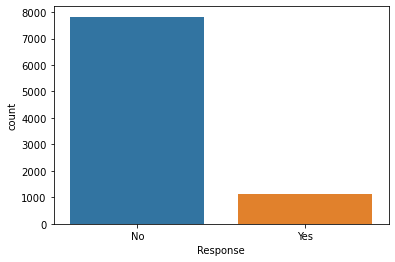

In [214]:
sns.countplot(x=customer_data["Response"])
plt.show()

In [215]:
%matplotlib inline

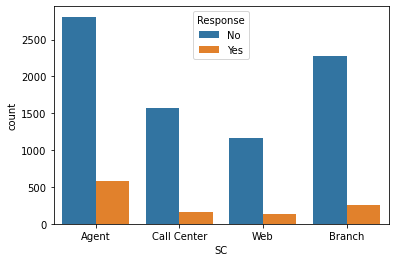

In [216]:
sns.countplot(x="SC", hue= "Response",  data=customer_data)
plt.show()

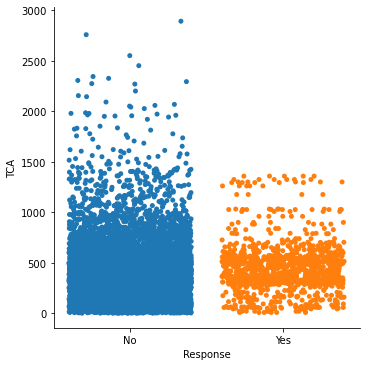

In [217]:
sns.catplot(x="Response",y="TCA", data=customer_data,jitter="0.4")
plt.show()

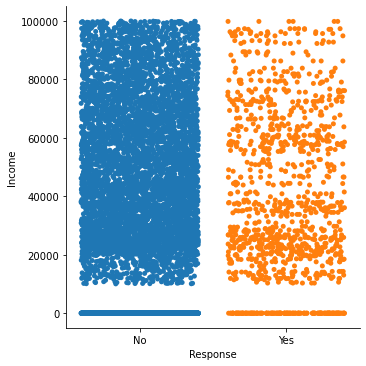

In [218]:
sns.catplot(x="Response",y="Income", data=customer_data, jitter="0.4")
plt.show()

In [219]:
customer_data.dtypes

State                object
CLV                 float64
Response             object
Coverage             object
Education            object
ETD          datetime64[ns]
ES                   object
Gender               object
Income                int64
LC                   object
MS                   object
MPA                   int64
MSLC                  int64
MSPI                  int64
NOC                   int64
NP                    int64
PT                   object
Policy               object
ROT                  object
SC                   object
TCA                 float64
VC                   object
VS                   object
month                 int64
dtype: object

In [220]:
numerical=customer_data.select_dtypes(include=np.number)
categorical=customer_data.select_dtypes(include=np.object)

<ipython-input-220-dbd2293ae71f>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=customer_data.select_dtypes(include=np.object)


In [221]:
numerical

,CLV,Income,MPA,MSLC,MSPI,NOC,NP,TCA,month
0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007,1
9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [222]:
categorical

,State,Response,Coverage,Education,ES,Gender,LC,MS,PT,Policy,ROT,SC,VC,VS
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


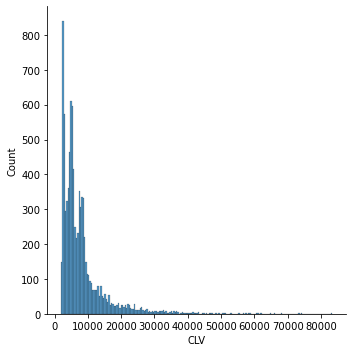

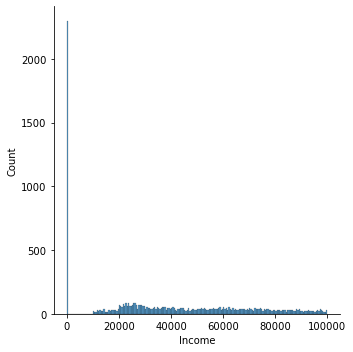

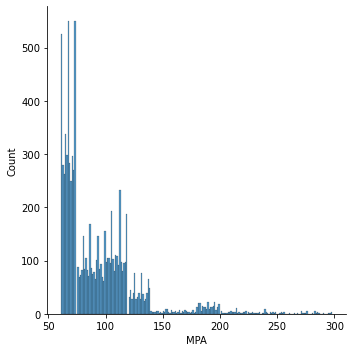

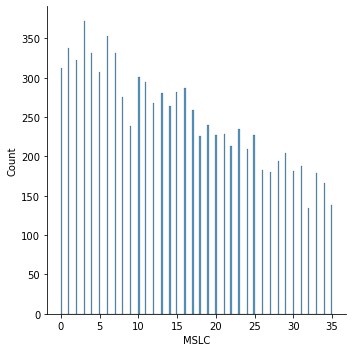

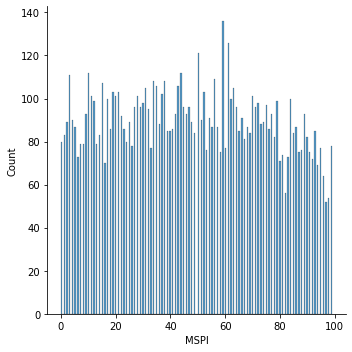

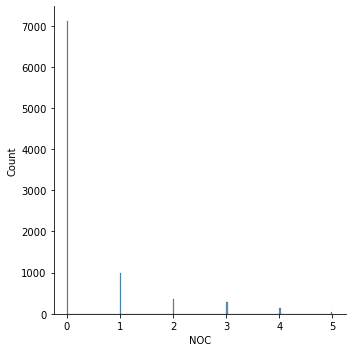

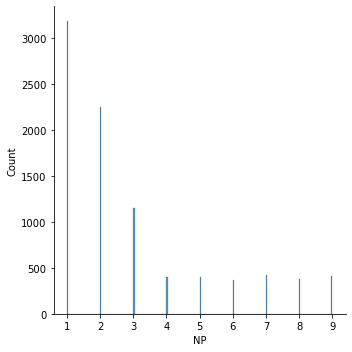

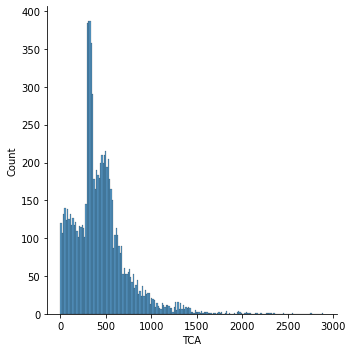

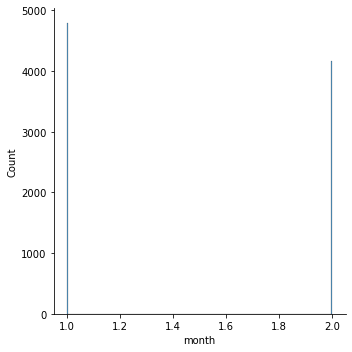

In [223]:
for i in range(len(numerical.columns)):
    sns.displot(numerical.iloc[:,i],bins=200)
    plt.show()
# seeing the plots we can definately say that none of them follow a normal distribution

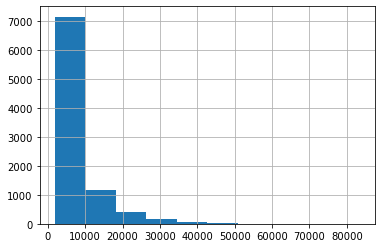

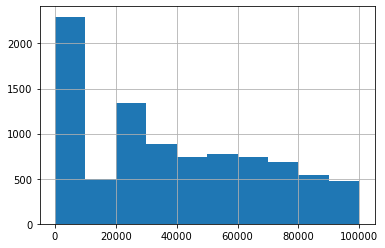

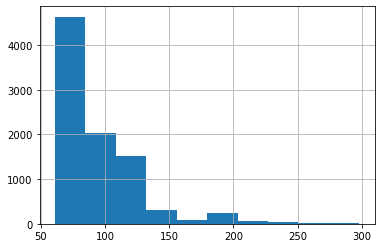

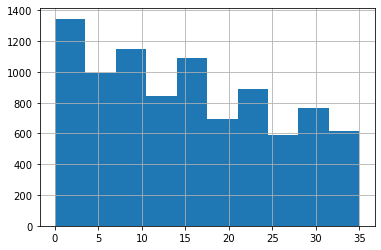

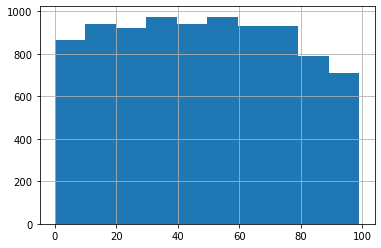

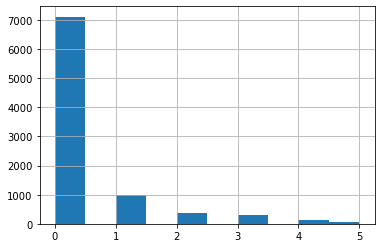

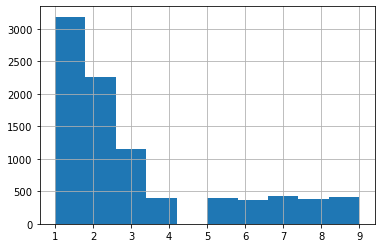

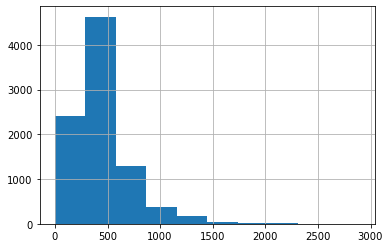

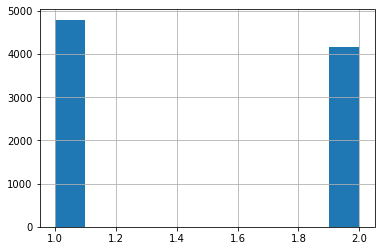

In [224]:
for i in range(len(numerical.columns)):
    numerical.iloc[:,i].hist()
    plt.show()

In [225]:
correlations_matrix=numerical.drop(["TCA"],axis=1).corr()

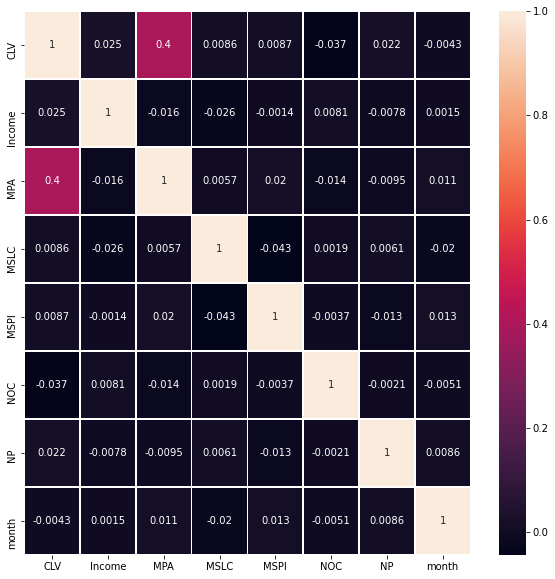

In [226]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlations_matrix,annot=True,linewidths=.5)
plt.show()

In [227]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [228]:
y_num=numerical["TCA"]
X_num=numerical.drop(["TCA"],axis=1)

In [229]:
transformer=MinMaxScaler().fit(X_num)
X_normalized=transformer.transform(X_num)
numerical2=pd.DataFrame(X_normalized,columns=X_num.columns)

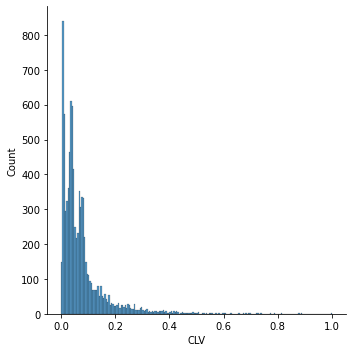

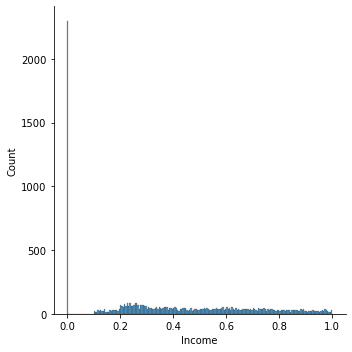

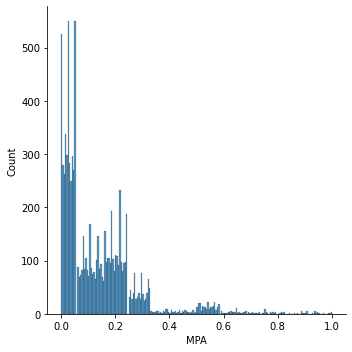

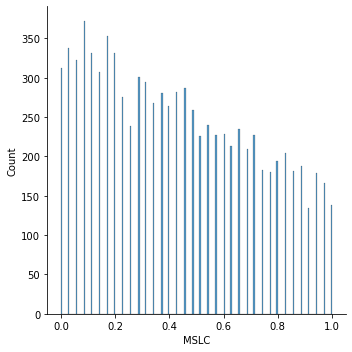

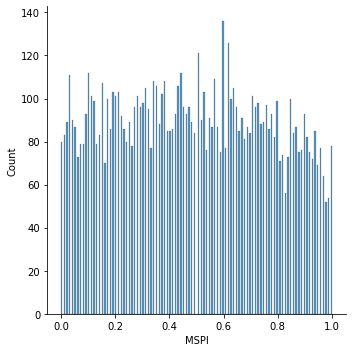

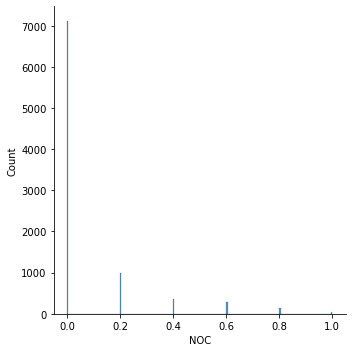

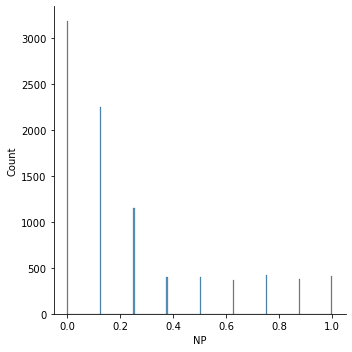

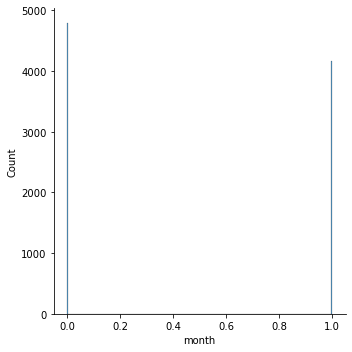

In [230]:
for i in range(len(numerical2.columns)):
    sns.displot(numerical2.iloc[:,i],bins=200)
    plt.show()

In [231]:
transformer1=StandardScaler().fit(X_num)
X_standarized=transformer1.transform(X_num)
numerical3=pd.DataFrame(X_standarized,columns=X_num.columns)

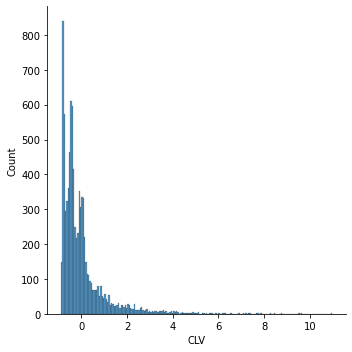

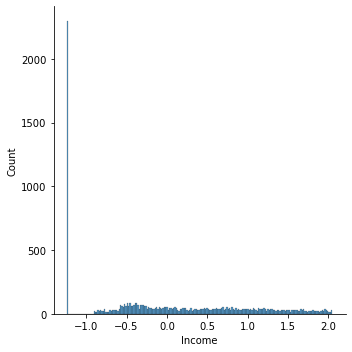

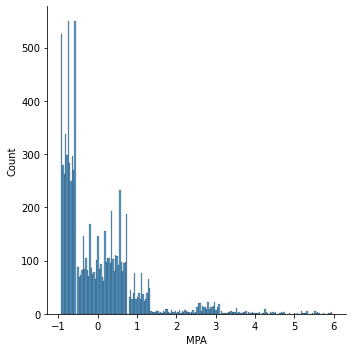

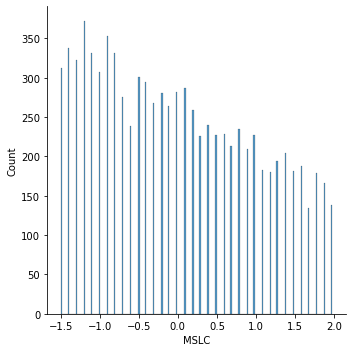

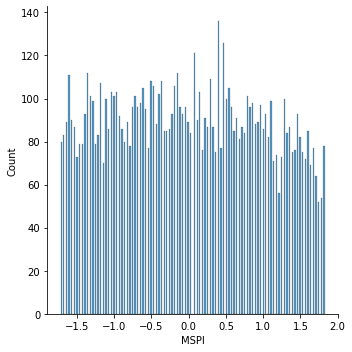

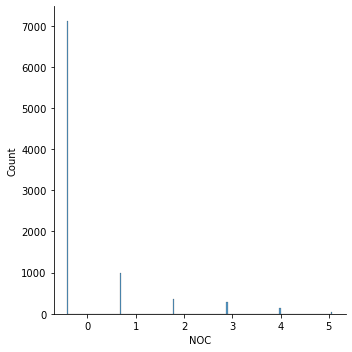

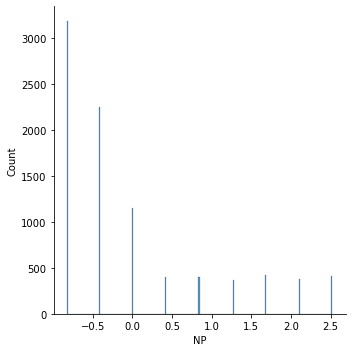

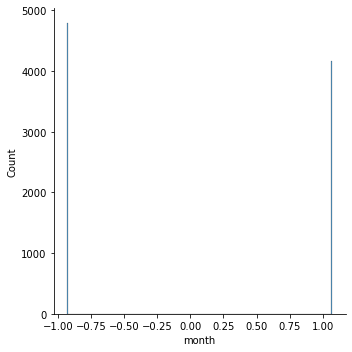

In [232]:
for i in range(len(numerical3.columns)):
    sns.displot(numerical3.iloc[:,i],bins=200)
    plt.show()

In [233]:
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict

In [235]:
X_cat=categorical

In [236]:
encoder=OneHotEncoder().fit(X_cat)
print(encoder.categories_)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

In [237]:
encoded1 = encoder.transform(X_cat).toarray()
print(encoded1)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]


In [238]:
encoded_cat=[]
for i in encoder.categories_:
    for a in i.tolist():
        encoded_cat.append(a)

In [239]:
df_encoded=pd.DataFrame(data=encoded1,columns=encoded_cat)
df_encoded

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8967,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8968,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8969,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [240]:
X = pd.concat([numerical2, df_encoded], axis=1)

In [241]:
X

,CLV,Income,MPA,MSLC,MSPI,NOC,NP,month,Arizona,California,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,0.027047,0.477701,0.181435,0.457143,0.585859,0.0,0.000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8967,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8968,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8969,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y_num,test_size=0.2,random_state=42)

In [244]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [245]:
lm= linear_model.LinearRegression()
model=lm.fit(X_train,y_train)

In [246]:
predictions=lm.predict(X_train)

In [247]:
r2_score(y_train,predictions)

0.7699662565838605

In [248]:
predictions2=lm.predict(X_test)

In [249]:
r2_score(y_test,predictions2)

0.7827590757438617

In [250]:
import math
mse=mean_squared_error(y_test,predictions2)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

17591.498580337044
132.6329468131393


In [251]:
mae=mean_absolute_error(y_test,predictions2)
print(mae)

91.93968670640668
